#Object Recognition using CNN


In the previous notebook, we have seen how to classify objects/images that are in grayscale format. In this notebook, we will build a CNN model to classify images that are coloured i.e., having RGB layers in it. 


In this notebook, we'll see new concepts like:

* Training model for coloured images
* Using regularization in the model
* Using Batch Normalization
* Saving and reusing trained model
* Model summary
* Training History



We will use **CIFAR10 dataset**, it is a large dataset of a total *60000* images, with *50000* training images and their labels, and *10000* testing images and their labels. There are 10 classes- **'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship' and 'Truck'** with *6000 images* in each class.

**Each image is of 32x32 pixels.** This dataset is present in Tensorflow.

####Steps

The steps will be similar to the CNN model built for Digit Recognition but in this, we will include some concepts such as regularization, batch normalization, *etc.,* at appropriate steps.


1. *Import all the necessary libraries*
2. *Load the dataset*
3. *Explorartory Data Analysis*
4. *Preprocessing of Data*
5. *Building the Model Pipeline*
6. *Train the model*
7. *Evaluate and Predict.*

## **1. Importing Libraries**

We will be using the following libraries to build the CNN model for object recognition.
1. Tensorflow - Tensorflow is a very powerful library developed by Google. It is open-sourced and is widely used for handling multi-dimensional data. It is preferred by programmers for building Deep Learning models.
2. Keras - Keras is a powerful library used for Artificial Neural Networks (ANNs). It provides a wide variety of functions for building complex ANN models. 
3. Matplotlib - This library is used to plot graphs in python, and since images also are 2 dimensional in nature, they can also be displayed.

#### **Sequential Model**

Keras comes built in with 3 methods for building the Neural networks- Sequential, Functional and Model-Subclassing. 

We'll be using Sequential API, we need not focus on the other two as for the scope of this notebook. *Sequential model groups a linear stack of layers into a tf.keras.Model object.*

#### **Keras Layers**

We'll be using various layers provided by keras in our project. They are:

*Dense*: Dense layers are the regular hidden layers used in artificial Neural Networks with n nodes.

*Conv2D, MaxPoolind2D*: These are the Convolutional layers as discussed in the previous notebooks.


Dropout: In this project we'll be using the regularization for Neural Networks, *i.e.,* **Dropout Regularization.**

Flatten:  Flatten will convert 2D data into 1D so that it can be fed into the fully connected layers.



### **Random**

Random is a very handy library to randomize any number/data. We'll use this to randomly select an image to see the variety of images.

###Let's Import all the necessary libraries. 

In [ ]:
import tensorflow as tf
# Importing the Keras modules containing model and layers
from keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
#%matplotlib inline # Un-comment this if using in iPython, i.e jupyter etc.
import random

## **2. Loading the Dataset**





Let's load the CIFAR10 Dataset. Even this dataset is present in **tf.keras.datasets** module.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


The load_data() method returns 2 *tuples*, one for training and one for testing. Each of these tuples have 2 numpy.ndarray arrays of X-data and y- labels.

## **3. Exploratory Data Analysis**

Exploratory Data Analysis Step includes Exploring the data before training it to find good possible features that can be used for training. Data Visualisation is one such major step.

The dataset has 10 classes as shown below. y_train and y_test have numbers which are the indexes for this list "class_names".

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Let us take a look at the images in the dataset.

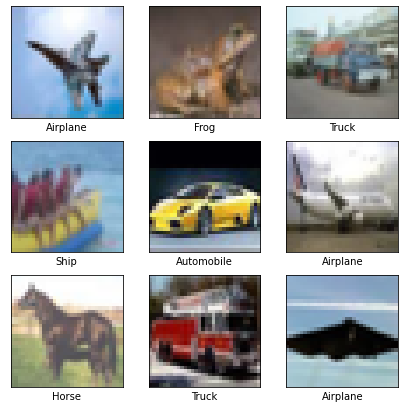

In [ ]:
#@title Few of the images are as shown

plt.figure(figsize=(7,7))
for i in range(1,10):
  ind = random.randint(0,50000)
  plt.subplot(3,3,i)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[ind],cmap="Greys")
  plt.xlabel(class_names[y_train[ind][0]])

### Dimensions of the data

Let us see the shape of these tensors

In [ ]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


>We see from the above code snippet, the image is already in 4 Dimensions- 50000 training and 10000 test images, with 32x32 pixels, the 4th being the 3 channels for RGB layers. 

>The labels are of 2 dimensions because each element is an array. We'll see that below.



### Displaying Raw data.

Let's see the contents of these numpy arrays.

The X-Train looks like...

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

We observe that the innermost array has 3 values, each value corresponding to each RGB layer.

Now Y-Train

In [ ]:
y_train[0]

array([6], dtype=uint8)

We observe that the first image has this label which is an array, and the number in that array corresponds to the class of the object in the image.

### Displaying the Actual Image

We'll now try to display the actual image using the matplotlib.pyplot library.

Index is 22822 and The Image label is:  Automobile 




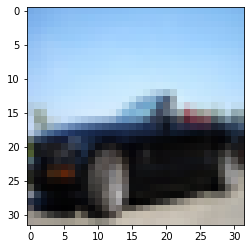

In [ ]:
# Select any image index up to 50,000
image_index = random.randint(0,50000) # Or remove the "randint" method and manually enter a number

print("Index is",image_index,"and The Image label is: ", class_names[y_train[image_index][0]],"\n\n") 
plt.imshow(x_train[image_index], cmap='Greys')


Randint generates a random integer between the two arguments provided to it.

The imshow method will display the image in a graph by taking the input tensors provided to it

We see that the images aren't clear to the human eyes, since it's resolution is only 32x32 pixels.

## **4. Pre-Processing the Data**



Preprocessing is an important step in the *data mining process*. The Pre-Processing Step ensures that proper data with correct format is fed into the Model. This is due to the fact that some models will only work in a given dimension format. 

Keras API takes only 4-D inputs, the 4th dimension being the number of channels in the data. In our data, we already have 4 dimensions, so we need not do any conversions.

Let us observe a random pixel row in the image- say 16th, for each pre processing step to undertand how the data is being modified.

In [ ]:
x_train[0][16]

array([[149, 115,  79],
       [143,  95,  49],
       [144,  97,  51],
       [151,  99,  51],
       [132,  87,  49],
       [ 64,  40,  21],
       [ 84,  59,  41],
       [112,  69,  37],
       [163, 121,  75],
       [223, 204, 166],
       [206, 182, 157],
       [145,  90,  56],
       [196, 133,  84],
       [204, 157, 110],
       [220, 188, 156],
       [243, 226, 208],
       [245, 237, 226],
       [239, 233, 215],
       [234, 224, 201],
       [231, 217, 192],
       [195, 181, 152],
       [150, 137, 100],
       [208, 193, 154],
       [250, 241, 216],
       [227, 216, 173],
       [163, 142,  78],
       [145, 127,  60],
       [143, 129,  62],
       [140, 123,  55],
       [136, 116,  46],
       [121,  95,  30],
       [114,  82,  40]], dtype=uint8)

Now, some of the functionalities like activation functions work only with numbers ranging from 0 to 1,thus we need to convert the pixel values in this range.
>The pixel values range from 0 to 255

>To convert to 0 to 1, 

>we need to divide the numbers by 255

To ensure that the pixels will be in decimals after dividing them, we'll convert them to float type before division

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
x_train[0][16]

array([[149., 115.,  79.],
       [143.,  95.,  49.],
       [144.,  97.,  51.],
       [151.,  99.,  51.],
       [132.,  87.,  49.],
       [ 64.,  40.,  21.],
       [ 84.,  59.,  41.],
       [112.,  69.,  37.],
       [163., 121.,  75.],
       [223., 204., 166.],
       [206., 182., 157.],
       [145.,  90.,  56.],
       [196., 133.,  84.],
       [204., 157., 110.],
       [220., 188., 156.],
       [243., 226., 208.],
       [245., 237., 226.],
       [239., 233., 215.],
       [234., 224., 201.],
       [231., 217., 192.],
       [195., 181., 152.],
       [150., 137., 100.],
       [208., 193., 154.],
       [250., 241., 216.],
       [227., 216., 173.],
       [163., 142.,  78.],
       [145., 127.,  60.],
       [143., 129.,  62.],
       [140., 123.,  55.],
       [136., 116.,  46.],
       [121.,  95.,  30.],
       [114.,  82.,  40.]], dtype=float32)

In [ ]:
# Normalizing by dividing with 255
x_train /= 255
x_test /= 255

In [ ]:
x_train[0][16]


array([[0.58431375, 0.4509804 , 0.30980393],
       [0.56078434, 0.37254903, 0.19215687],
       [0.5647059 , 0.38039216, 0.2       ],
       [0.5921569 , 0.3882353 , 0.2       ],
       [0.5176471 , 0.34117648, 0.19215687],
       [0.2509804 , 0.15686275, 0.08235294],
       [0.32941177, 0.23137255, 0.16078432],
       [0.4392157 , 0.27058825, 0.14509805],
       [0.6392157 , 0.4745098 , 0.29411766],
       [0.8745098 , 0.8       , 0.6509804 ],
       [0.80784315, 0.7137255 , 0.6156863 ],
       [0.5686275 , 0.3529412 , 0.21960784],
       [0.76862746, 0.52156866, 0.32941177],
       [0.8       , 0.6156863 , 0.43137255],
       [0.8627451 , 0.7372549 , 0.6117647 ],
       [0.9529412 , 0.8862745 , 0.8156863 ],
       [0.9607843 , 0.92941177, 0.8862745 ],
       [0.9372549 , 0.9137255 , 0.84313726],
       [0.91764706, 0.8784314 , 0.7882353 ],
       [0.90588236, 0.8509804 , 0.7529412 ],
       [0.7647059 , 0.70980394, 0.59607846],
       [0.5882353 , 0.5372549 , 0.39215687],
       [0.

And that's it. We're done with pre-processing and now we'll proceed to further steps.

## **5. Building the Model**

Now comes the most important step in the process- building the network.

We'll use Sequential model for this project. You're free to explore other types of models on web.

We'll add a combination of the layers specified above.

We'll try to add complicated structures in our model since the dataset it not large enough. Thus we'll add High level Architectures and Add Proper Regularization Steps before training it for many Epochs.

Sequential model is used. We'll take three sets, each set having a couple of Conv2D layers then a MaxPooling layer, while utilizing the batch normalization and droput regularization in between them to reduce overfitting.

The dropout rate is casually increased after each set.

Note that the number of filters in Conv2D layers and the number of neurons in the dense layers are taken by trial to get a high accuracy. You can try varying the filters/neurons or even the sets and check the varied accuracy.

In [ ]:
model = Sequential()

# Set 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# We'll apply Batch Normalization after each Convolution Layer
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#Lets add the Droput Regularization with at an increasing rate.
model.add(Dropout(0.2))

# Set 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Set3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
#Flattening the output of previous layers
model.add(Flatten())

#adding the fully connected layer with 128 neurons
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Adding the output layer with 10 classes
model.add(Dense(10, activation='softmax'))

Always remember to add the input_shape parameter in the first layer of the network- which is the shape of each sample(image).



##### **Dropout Layer**

Dropout refers to dropping(not considering in both forward and backward pass) some neurons in the network during the training phase. The neurons which are dropped are chosen at random, and the number of such neurons to be dropped is defined by the droput rate which ranges from 0 to 1, 0 meaning no nodes are dropped and 0.5 meaning 50%  of the nodes being dropped and so on.*


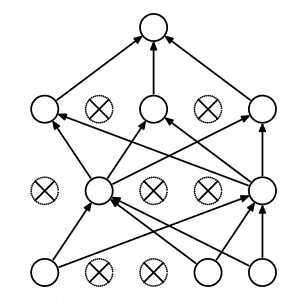

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/1-13.png")

Img src: https://medium.com/@prasadpal107/dictionary-for-cnn-753a1a39db45

As shown in the image, few neurons are ignored in the training process to reduce *overfitting*.

##### **Batch Normalization:** 
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. [Batch Normalization](https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/)

In Conv2D layer, we took a kernel size of 3x3 matrix. We have used padding of zeroes to ensure outputs are of same dimensions. We have used ReLU activation and 'he_uniform' initializer for giving the initial values in the kernel.  

The pool size of Maxpooling is taken as 2x2.

It is then flattened into 1D by using a Flatten() after Maxpooling in the last set.

A dropout is specified after each set with an increasing rate of 20, 30, 40 and 50%.

Then, Dense layers of 128 Neurons are added with relu activation.

Finally an output layer with 10 Neurons are added with softmax activation. The final layer has 10 nodes/neurons since we have 10 classes for each class.

#### **Model Summary**

Occasionally we'll come accross the terms "number of parameters". Now we'll try to display the number of parameters in our network that need to be trained along with the layer information for each layer. Basically model.summary() method summarizes all this. 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## **6.Compiling and Training the Model**

#### **Saving and Reusing the model**

Saving the Trained model is a very handy step, as we don't have to train the model again just for predicting it, and is usually done for models which take very long time to train, as in this model. So the model once trained and saved can be used any number of times to evaluate and predict. 

*The model is already Trained, thus we'll load the saved model.* It had achieved a test accuracy of 82- 86%

If you want to train the model by yourself, do it as you please. But remember it'll take a while to train many epochs to get a higher accuracy.

In [ ]:
#Loading the saved model instead of training again to reduce time
try:
  saved_model = models.load_model("drive/MyDrive/Content/Sreeram/SavedModel/my_model")
  print("Model Loaded!")
except NameError: 
  print("Error: Please Re-Run the complete code")
except:
  print("Model was not saved before, please Train the model")

# Now we don't have to Train again and we can directly go and evaluate and predict our Model

Model Loaded!


The above code will try to load the model if available. You should skip the Training, that is the next few code blocks if you don't want to train and directly go to the **Evaluation Step**. Run all the below cells if you want to train it.

#### **Compiling**

The Physical Network Structure was added, but we need to instruct our network how it is going to be trained.

The model.compile() method is used to specify these arguments.

It significantly contains three arguments- 1. optimizer: The algorithm to be used (such as SGD for Stochastic Gradient Descent), 2: Loss: The Loss function, 3. Metrics: The metrics that need to be displayed while the model is training.

We have taken slightly modified adam optimizer or Stochastic Gradient Descent with some momentum(Try both of them and compare the accuracies), sparse_categorical_crossentropy loss and accuracy metrics. Adam with a changed learning rate and enabling logits for the SCC loss. 
*The from_logits=True attribute inform the loss function that the output values generated by the model are not normalized, a.k.a. logits.*

In [ ]:
#Skip this if Using saved model

#Let's take Adam optimizer with a slower learning rate of 0.0001 (Default is 0.001) or SGD with Momentum
opt1 = optimizers.Adam(learning_rate=0.01)
opt2 = optimizers.SGD(learning_rate=0.001, momentum=0.9)

#Let's take Sparse Categorical Crossentropy loss function
lf = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#compiling the model
model.compile(optimizer= opt1,
              loss= lf,
              metrics=['accuracy'])


Now the training begins! model.fit() method handles training. Now the input data - x_train and y_train are fed into the model. 

We train the model for 10 epochs. 
Training the model takes more time as compared to other code blocks. 

#### **Training**

In [ ]:
#Run if you want to train the network, else skip if using saved model
history = model.fit(x_train, y_train, epochs=40, 
                    validation_data=(x_test, y_test))

model.save("drive/MyDrive/Content/Sreeram/SavedModel/my_model")

new_model = model

Epoch 1/40
1563/1563 [==============================] - 411s 262ms/step - loss: 1.8351 - accuracy: 0.3537 - val_loss: 1.1349 - val_accuracy: 0.5953
Epoch 2/40
1563/1563 [==============================] - 403s 258ms/step - loss: 1.1033 - accuracy: 0.6131 - val_loss: 0.9995 - val_accuracy: 0.6685
Epoch 3/40
1563/1563 [==============================] - 404s 259ms/step - loss: 0.9269 - accuracy: 0.6809 - val_loss: 0.8080 - val_accuracy: 0.7218
Epoch 4/40
1563/1563 [==============================] - 403s 258ms/step - loss: 0.8271 - accuracy: 0.7175 - val_loss: 0.7361 - val_accuracy: 0.7492
Epoch 5/40
1563/1563 [==============================] - 403s 258ms/step - loss: 0.7796 - accuracy: 0.7362 - val_loss: 0.7432 - val_accuracy: 0.7503
Epoch 6/40
1563/1563 [==============================] - 412s 264ms/step - loss: 0.7124 - accuracy: 0.7599 - val_loss: 0.6021 - val_accuracy: 0.7960
Epoch 7/40
1563/1563 [==============================] - 412s 263ms/step - loss: 0.6760 - accuracy: 0.7687 - val_

#### **Training History.**

To have a visual understanding on how the model trained between the epochs, let's try to plot the graph of training and validation accuracy. 

Validation data is usually a small split in test data occasionally used to observe the trend in the training process.

In our example, we have directly taken the test data for the purpose of simplicity.

model.fit() method returns history object, which has a dictionary holding the history of all the accuracies we need and have mentioned.

##### Plotting the history

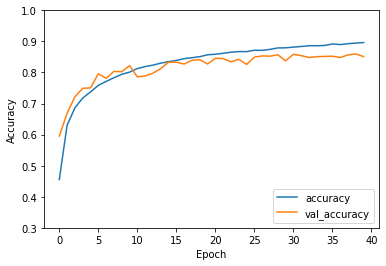

In [ ]:
#Skip this too if using saved model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')


## **7. Evaluating the Model**

Now after the Training step, we need to evaluate the model on unseen data- that is the test data. 

model.evaluate() method will handle the evaluation when it is fed with test data or x_test and y_test.

In [ ]:
#model = saved_model  # Uncomment this line if using Saved model
_ , acc = model.evaluate(x_test, y_test)

print("The Accuracy on the testing data is: ",acc*100,"%")

313/313 [==============================] - 19s 59ms/step - loss: 0.5219 - accuracy: 0.8511
The Accuracy on the testing data is:  85.11000275611877 %


### **Predicting**

Next is the most interesting part of the process, that is predicting the class of an unseen image.

model.predict() method will take a single sample/image and produce the output in the form of an array since we have 10 outputs. The array will have the probabilities of the image belonging to each class.
For example, if the class of an image is 5, the array will have probabilities of the 6th element (array starts from 0) higher than the other elements.


Let us Display the Image and predict the image which gives us the predicted array. Remember to reshape the input image of the test data as we only reshaped the training data previously, since keras models work only with 4D tensors.

To get the prediction from the array, we need to get the index of the highest probability in the array. This can be done by argmax() method of numpy arrays.

In [ ]:
import numpy as np
list1 = np.array([0, 54, 87, 13, 12, 99, 14, 45])
print("The index of the highest element is: ", list1.argmax())

The Predicted Array is:  [[2.3413544e-14 1.0000000e+00 3.1578108e-16 1.4674825e-16 2.4706823e-17
  9.2647273e-17 2.6434708e-13 2.2420353e-16 2.8783871e-11 2.7458534e-11]] 

Class : Probability

Airplane : 0.00%
Automobile : 100.00%
Bird : 0.00%
Cat : 0.00%
Deer : 0.00%
Dog : 0.00%
Frog : 0.00%
Horse : 0.00%
Ship : 0.00%
Truck : 0.00%

The Predicted class is: ' Automobile ' with a probability of 100.0 %

The Actual class is:  Automobile 




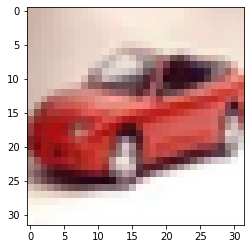

In [ ]:
#class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
#               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
#keep this for reference to the predicted array

image_index = random.randint(0,10000) # Or enter an index manually
#image_index = 1337
plt.imshow(x_test[image_index],cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, 32, 32, 3))
print("The Predicted Array is: ",pred,'\n')

#Let's check the probabilities for each class
print("Class : Probability", end='\n\n')
for i in range(10):
  print("{0} : {1:0.2f}%".format(class_names[i], pred[0][i]*100))


print("\nThe Predicted class is: '",class_names[pred.argmax()],"' with a probability of", pred[0][pred.argmax()]*100,"%\n")
print("The Actual class is: ",class_names[y_test[image_index][0]],'\n\n')


> Try to observe the percentages of the other classes too, as you might find high probabilities for similar looking objects, such as dog and cat.

---